In [ ]:
#@title Установка нужных версий библиотек
!wget 'https://drive.google.com/uc?export=download&id=1oSFOP0j25OZAuhD8YXxyQXNTdr2lUdtn' -O requirements.txt
!pip install -r requirements.txt

## Зачем нужен взвешенный *KNN* для классификации

Расшифровывается название как _"k ближайших соседей (k nearest neighbours)"_.

- Обучения нет, модель запоминает обучающую выборку
- На моменте предсказания
    1. Считаем **расстояния** до всех объектов с **обучения**
    2. Выбираем **K** ближайших
    3. Делаем **голосование** между соседами, за какой класс больше голосов, тот и выбираем


 <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png'>


Давайте обучим модель KNN из `sklearn` на сгенерированных данных.

Сгенерируем два класса с помощью функции `make_moons`.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=50, random_state=6)

display(X, y)

array([[ 2.00000000e+00,  5.00000000e-01],
       [ 1.38268343e+00, -4.23879533e-01],
       [ 1.13052619e+00, -4.91444861e-01],
       [-9.91444861e-01,  1.30526192e-01],
       [ 6.08761429e-01,  7.93353340e-01],
       [ 1.00000000e+00,  0.00000000e+00],
       [ 7.07106781e-01,  7.07106781e-01],
       [ 6.17316568e-01, -4.23879533e-01],
       [-2.58819045e-01,  9.65925826e-01],
       [ 2.92893219e-01, -2.07106781e-01],
       [ 1.99144486e+00,  3.69473808e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-7.93353340e-01,  6.08761429e-01],
       [ 9.23879533e-01,  3.82683432e-01],
       [ 1.50000000e+00, -3.66025404e-01],
       [ 7.61204675e-02,  1.17316568e-01],
       [ 1.70710678e+00, -2.07106781e-01],
       [ 2.06646660e-01, -1.08761429e-01],
       [ 1.96592583e+00,  2.41180955e-01],
       [-6.08761429e-01,  7.93353340e-01],
       [-9.23879533e-01,  3.82683432e-01],
       [ 1.33974596e-01,  0.00000000e+00],
       [ 1.25881905e+00, -4.65925826e-01],
       [-7.

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0])

Разобьем выборку на обучение и тест с помощью `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=5)
X_train.shape, X_test.shape

((45, 2), (5, 2))

И отрисуем полученные точки, синие - это один класс, оранжевые - это второй класс, а вот зеленые звезды - это тестовые точки, для них будет искать ближайших соседей.

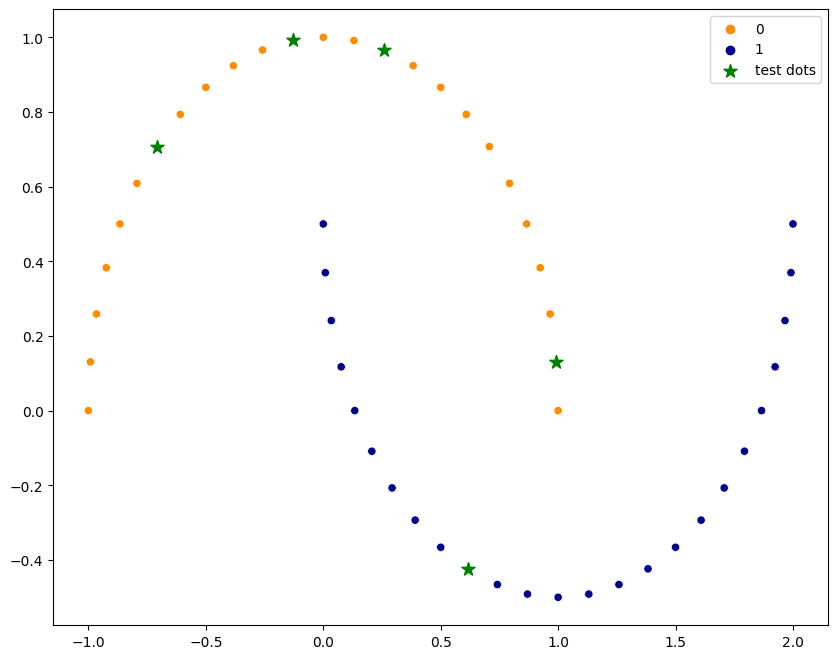

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_test[:, 0], X_test[:, 1], c='g', marker='*', s=100, label='test dots')
plt.legend();

Обучим модель `KNeighborsClassifier` для задачи классификации из `sklearn`.

Укажем, что хотим слышать мнение 20 соседей, для нашей задачи из 50 объектов - это много соседей, но давайте пока обучимся так и посмотрим, а действительно ли 20 - это плохое количество соседей.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 20
model = KNeighborsClassifier(n_neighbors=n_neighbors)

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

И теперь можем сделать предсказания для наших тестовых объектов.

In [ ]:
pred_test = model.predict(X_test)
pred_test

array([0, 1, 0, 0, 1])

И посмотрим, насколько предсказанные классы похожи на правду.

In [ ]:
display(pred_test, y_test)

array([0, 1, 0, 0, 1])

array([0, 0, 0, 0, 1])

Не совпали для одной точки, возможно для неё мы и переборщили с количеством соседей.

#### Детали получения предсказания в KNN

Получим ближайших соседей для парочки тестовых объектов.

In [ ]:
import numpy as np
import pandas as pd


idx = 0
test_dot = X_test[idx]

distances = pd.DataFrame()
for i, train_dot in enumerate(X_train):  # 1
    distances = distances.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2)  # 2
    }, ignore_index=True)

<ipython-input-8-d7a5f4ce36ec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-8-d7a5f4ce36ec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-8-d7a5f4ce36ec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-8-d7a5f4ce36ec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-8-d7a5f4ce36ec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.appe

И получим их индексы для дальнейшей отрисовки.

In [ ]:
distances

,train_idx,dst
0,0.0,1.802442
1,1.0,0.517638
2,2.0,1.580136
3,3.0,1.820611
4,4.0,0.261052
5,5.0,0.130806
6,6.0,1.414214
7,7.0,0.884577
8,8.0,1.503680
9,9.0,0.532986


In [ ]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Int64Index([5, 17, 31, 4, 30, 1, 28, 9, 20, 24, 21, 16, 42, 40, 39, 33, 7, 15,
            23, 14],
           dtype='int64')

Отрисовываем 20 найденных соседей в полупрозрачные зеленые окружности.

Видим, что здесь нам повезло и большинство соседей являются оранжевым классом, именно представителем этого класса и является наш тестовый объект.

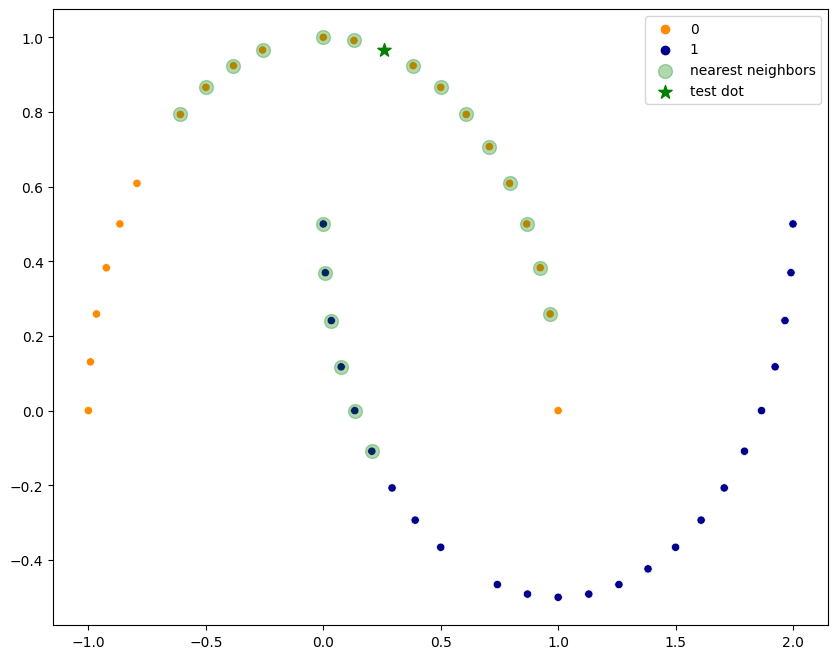

In [ ]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_train[nearest_neigbors_idxs, 0], X_train[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(X_test[idx, 0], X_test[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.legend();

А давайте возьмем еще один тестовый объект.

In [ ]:
idx = 1
test_dot = X_test[idx]

distances = pd.DataFrame()
for i, train_dot in enumerate(X_train):  # 1
    distances = distances.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2),  # 2
        'label': y_train[i]
    }, ignore_index=True)

<ipython-input-12-8759c2e77d93>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-12-8759c2e77d93>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-12-8759c2e77d93>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-12-8759c2e77d93>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-12-8759c2e77d93>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.appe

In [ ]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Int64Index([22, 23, 33, 42, 24, 32, 2, 27, 1, 13, 19, 35, 29, 3, 10, 38, 30,
            43, 37, 14],
           dtype='int64')

А вот здесь не повезло, т.к. наши 20 ближайших соседей в большинстве своем являются представителями синего класса, а наш тестовый объект на самом деле оранжевый класс, так что 20 - это всё-таки многовато для нашей задачи.

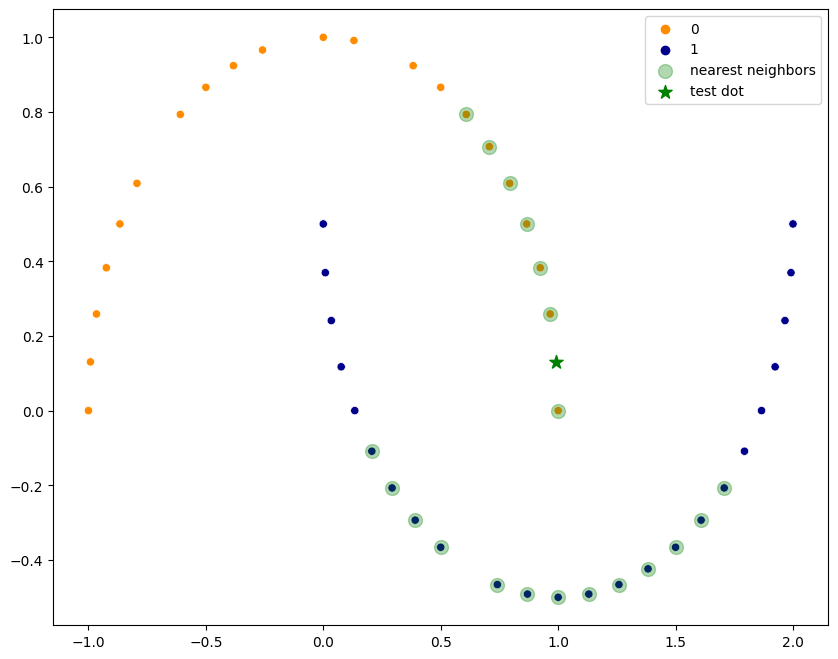

In [ ]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_train[nearest_neigbors_idxs, 0], X_train[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(X_test[idx, 0], X_test[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.legend();

Но как мы можем с этим побороться?

А можем пользоваться модификацией модели KNN - **Weighted KNN (взвешенный KNN)**

### Взвешенный KNN

По дефолту модель с `sklearn` обучается с атрибутом `weights=uniform` - это значит, что каждый сосед одинаково важен и одинаково влияет на финальное предсказание модели.

In [ ]:
KNeighborsClassifier?

Но мы можем это поменять и сделать каких-то соседей более значимыми, а каких-то менее, для этого атрибут `weights` поменяем на `distance`.

В этом случае веса будут обратными расстоянию до объектов с обучения.

Можем привести пример на наших 20 соседях.

In [ ]:
n_neighbors = 20
model = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [ ]:
pred_test = model.predict(X_test)
display(pred_test, y_test)

array([0, 0, 0, 0, 1])

array([0, 0, 0, 0, 1])

А вот теперь всё совпало.


#### Детали получения предсказания в KNN

Возьмем тот объект, где была ошибка.

In [ ]:
idx = 1
test_dot = X_test[idx]

distances = pd.DataFrame()
for i, train_dot in enumerate(X_train):  # 1
    distances = distances.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2),  # 2
        'label': y_train[i]
    }, ignore_index=True)

<ipython-input-19-8759c2e77d93>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-19-8759c2e77d93>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-19-8759c2e77d93>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-19-8759c2e77d93>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-19-8759c2e77d93>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.appe

In [ ]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Int64Index([22, 23, 33, 42, 24, 32, 2, 27, 1, 13, 19, 35, 29, 3, 10, 38, 30,
            43, 37, 14],
           dtype='int64')

Все те же самые соседи, но теперь те, кто находятся далеко влияют меньше, а те, кто близко влияют больше.

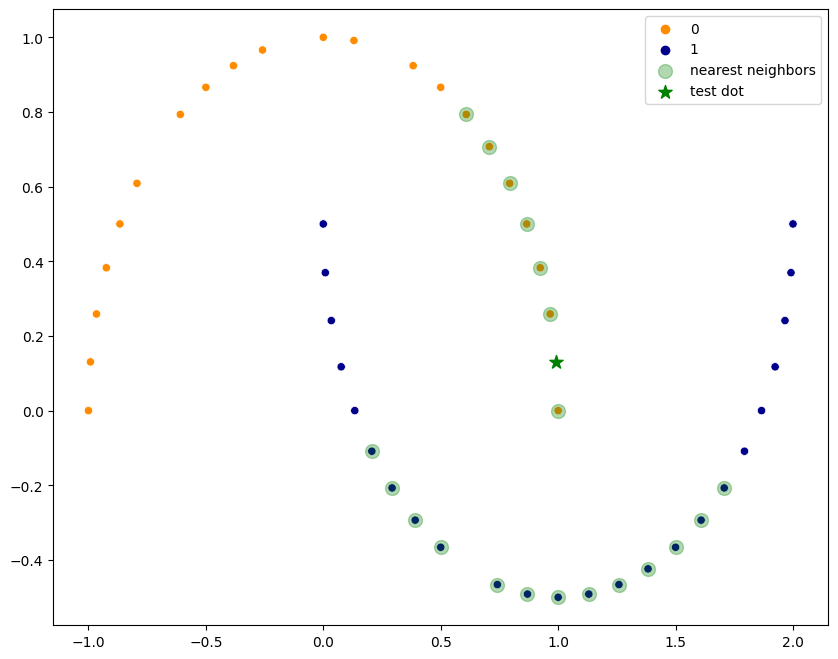

In [ ]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_train[nearest_neigbors_idxs, 0], X_train[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(X_test[idx, 0], X_test[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.legend();

Можем рассчитать вес каждого соседа, для этого 1 поделим на расстояние до объекта.

In [ ]:
distances['weight'] = 1 / distances['dst']
distances = distances.sort_values('dst').head(n_neighbors)
distances

,train_idx,dst,label,weight
22,22.0,0.130806,0.0,7.644894
23,23.0,0.130806,0.0,7.644894
33,33.0,0.261052,0.0,3.830649
42,42.0,0.390181,0.0,2.562915
24,24.0,0.517638,0.0,1.931852
32,32.0,0.630584,1.0,1.585831
2,2.0,0.633818,1.0,1.577741
27,27.0,0.637332,1.0,1.569042
1,1.0,0.642879,0.0,1.555503
13,13.0,0.646828,1.0,1.546005


In [ ]:
np.linspace(0, 1, 50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

<ipython-input-24-bc6cbb17cb7b>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, 1/(x))


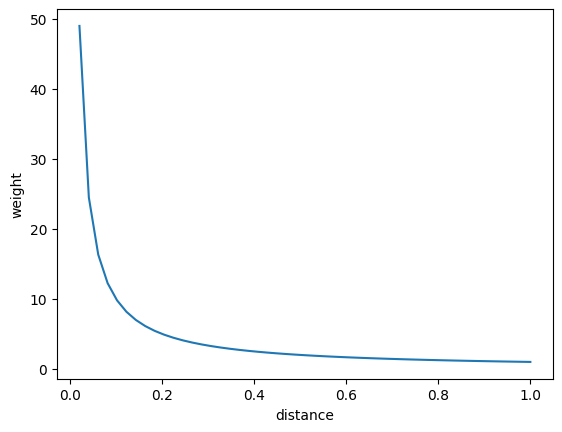

In [ ]:
x = np.linspace(0, 1, 50)
plt.plot(x, 1/(x))
plt.ylabel('weight')
plt.xlabel('distance');

Зная вес каждого соседа, можем посчитать взвешенную сумму и где сумма весов будет больше, тот класс и наше финальное предсказание.

Победил нулевой класс - а это наш оранжевый.

In [ ]:
display(f"Вес для класса 0 - {distances[distances['label'] == 0]['weight'].sum()}",
        f"Вес для класса 1 - {distances[distances['label'] == 1]['weight'].sum()}")

'Вес для класса 0 - 26.477269988013717'

'Вес для класса 1 - 18.588307260356473'

Получаем, что по обычному большинству побеждал первый класс, а по весу побеждает нулевой класс, т.к. не все объекты активно участвуют в голосовании.

In [ ]:
distances['label'].value_counts()

1.0    13
0.0     7
Name: label, dtype: int64

И можем с помощью визуализации отрисовать важность соседей.

Те, кто ближе имеют полузеленую окружность больше, а те, кто дальше имеют маленькую окружность.

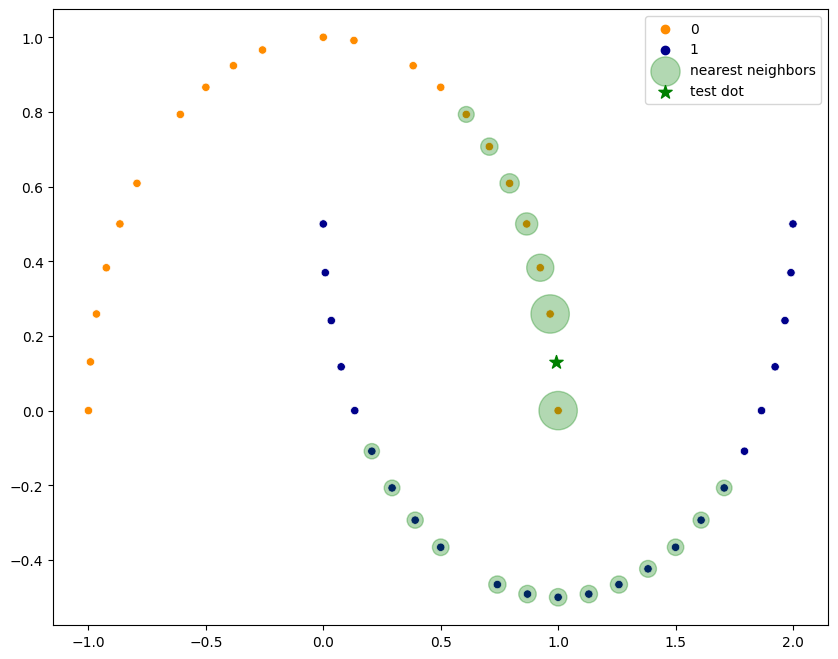

In [ ]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_train[nearest_neigbors_idxs, 0], X_train[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=distances['weight']*100, label='nearest neighbors')

plt.scatter(X_test[idx, 0], X_test[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.legend();

#### Резюме взвешенного KNN


На **моменте обучения** ничего интересного не происходит: все точки из обучения попросту запоминаются.

На **моменте предсказания**:
1. для тестовой точки считаем расстояния до всех точек с обучения
2. сортируем от самого ближнего до самого дальнего расстояния
3. считаем веса для ближайших $N$ соседей
4. суммируем веса для каждого класса, где максимальная сумма - это предсказанная метка класса

## Зачем нужен взвешенный KNN для регрессии

А теперь давайте обсудим, чем может быть полезен KNN для регрессии.

Но для начала давайте быстро вспомним, в чем суть модели *KNN* для этой задачи.

- Обучения нет, модель запоминает обучающую выборку
- На моменте предсказания
    1. Считаем **расстояния** до всех объектов с **обучения**
    2. Выбираем **K** ближайших
    3. Делаем **усреднение** между соседами


 <img src='https://drive.google.com/uc?id=1ABbqUeWI0vpWslGm_cBw-wWe5TpWxV6D' width=500>


Давайте обучим модель KNN для регресии из `sklearn` на сгенерированных данных.

Сгенерируем 50 объектов с помощью придуманной функции.

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
np.random.seed(8)

def func(x):
    return 0.03*x**3 + 0.2*x**2


X = np.linspace(-10, 10, 50).reshape(-1, 1)
y = func(X) + np.random.randn(50, 1)

display(X, y)


array([[-10.        ],
       [ -9.59183673],
       [ -9.18367347],
       [ -8.7755102 ],
       [ -8.36734694],
       [ -7.95918367],
       [ -7.55102041],
       [ -7.14285714],
       [ -6.73469388],
       [ -6.32653061],
       [ -5.91836735],
       [ -5.51020408],
       [ -5.10204082],
       [ -4.69387755],
       [ -4.28571429],
       [ -3.87755102],
       [ -3.46938776],
       [ -3.06122449],
       [ -2.65306122],
       [ -2.24489796],
       [ -1.83673469],
       [ -1.42857143],
       [ -1.02040816],
       [ -0.6122449 ],
       [ -0.20408163],
       [  0.20408163],
       [  0.6122449 ],
       [  1.02040816],
       [  1.42857143],
       [  1.83673469],
       [  2.24489796],
       [  2.65306122],
       [  3.06122449],
       [  3.46938776],
       [  3.87755102],
       [  4.28571429],
       [  4.69387755],
       [  5.10204082],
       [  5.51020408],
       [  5.91836735],
       [  6.32653061],
       [  6.73469388],
       [  7.14285714],
       [  7

array([[-9.90879528e+00],
       [-6.98247905e+00],
       [-8.31549023e+00],
       [-6.25838414e+00],
       [-5.86855764e+00],
       [-4.65401665e-02],
       [ 2.15116128e-01],
       [ 1.47569331e+00],
       [ 7.02264167e-01],
       [ 1.38483936e+00],
       [-3.97105122e-01],
       [ 2.96975123e+00],
       [ 9.85280388e-02],
       [ 6.39928015e-01],
       [ 9.33594782e-01],
       [ 4.66448970e-01],
       [ 2.01408406e+00],
       [ 7.82819280e-01],
       [ 7.81859988e-01],
       [ 4.59877735e-01],
       [ 1.83569550e+00],
       [-2.86253089e-01],
       [ 2.12387622e-03],
       [ 4.92135298e-01],
       [-1.63791524e+00],
       [-4.74956092e-01],
       [ 6.17321899e-01],
       [ 1.40626152e+00],
       [ 6.57309931e-01],
       [ 1.87776873e-01],
       [ 2.78983690e+00],
       [ 1.74649192e+00],
       [ 2.76609419e+00],
       [ 3.84205420e+00],
       [ 4.69316779e+00],
       [ 5.49341696e+00],
       [ 7.98354952e+00],
       [ 8.02588219e+00],
       [ 1.0

Разобьем выборку на обучение и тест с помощью `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=5)
X_train.shape, X_test.shape

((45, 1), (5, 1))

И отрисуем полученные точки.

А зеленые звезды - это тестовые точки, для них будет искать ближайших соседей.

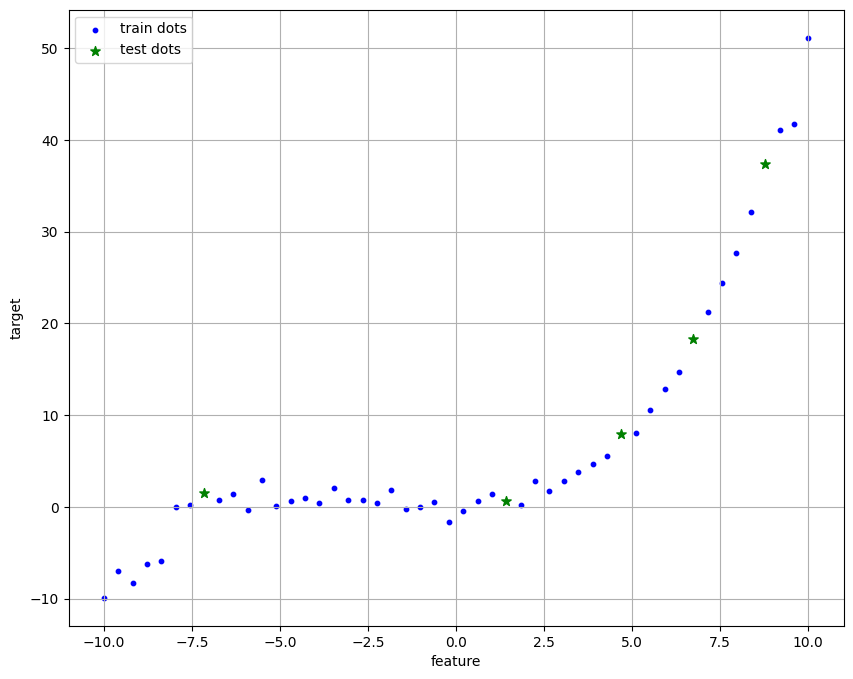

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(X_train, y_train, c='b', marker='o', s=10, label='train dots')
plt.scatter(X_test, y_test, c='g', marker='*', s=50, label='test dots')
plt.grid()
plt.ylabel('target')
plt.xlabel('feature')
plt.legend();

Инициализируем модель `KNeighborsRegressor` для задачи регрессии из `sklearn`.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 20
model = KNeighborsRegressor(n_neighbors=n_neighbors)

In [ ]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

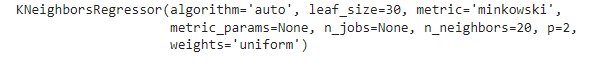

И теперь можем сделать предсказания для наших тестовых объектов.

In [ ]:
pred_test = model.predict(X_test)
pred_test

array([[ 2.80737304],
       [15.45383115],
       [-1.22462722],
       [15.45383115],
       [10.70420217]])

И посчитаем метрику качества. Она совсем печальная.

Видимо 20 соседей - это многовато для наших данных.

In [ ]:
from sklearn.metrics import r2_score

r2_score(pred_test, y_test)

-1.22454737493758

#### Детали получения предсказания в KNN

Давайте посмотрим на ближайших соседей для пары тестовых объектов.

Для этого
1. пройдемся по всем обучающим объектам
2. посчитаем Эвклидово расстояние (ведь именно оно и считается по умолчанию в KNN в `sklearn`) через `numpy.linalg.norm`.

In [ ]:
import numpy as np
import pandas as pd


idx = 0
test_dot = X_test[idx]

distances = pd.DataFrame()
for i, train_dot in enumerate(X_train):  # 1
    distances = distances.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2)  # 2
    }, ignore_index=True)

<ipython-input-35-d7a5f4ce36ec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-35-d7a5f4ce36ec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-35-d7a5f4ce36ec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-35-d7a5f4ce36ec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-35-d7a5f4ce36ec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances

И получим их индексы для дальнейшей отрисовки.

In [ ]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Int64Index([0, 43, 23, 11, 9, 34, 17, 19, 13, 21, 37, 33, 1, 20, 15, 7, 3, 27,
            6, 5],
           dtype='int64')

Отрисовываем 20 найденных соседей в полупрозрачные зеленые окружности.

Чтобы получить предсказания для тестового объекта, нужно усреднить целевые значения ближайших соседей.

И видим, что наше предсказание в целом-то походит на правду.

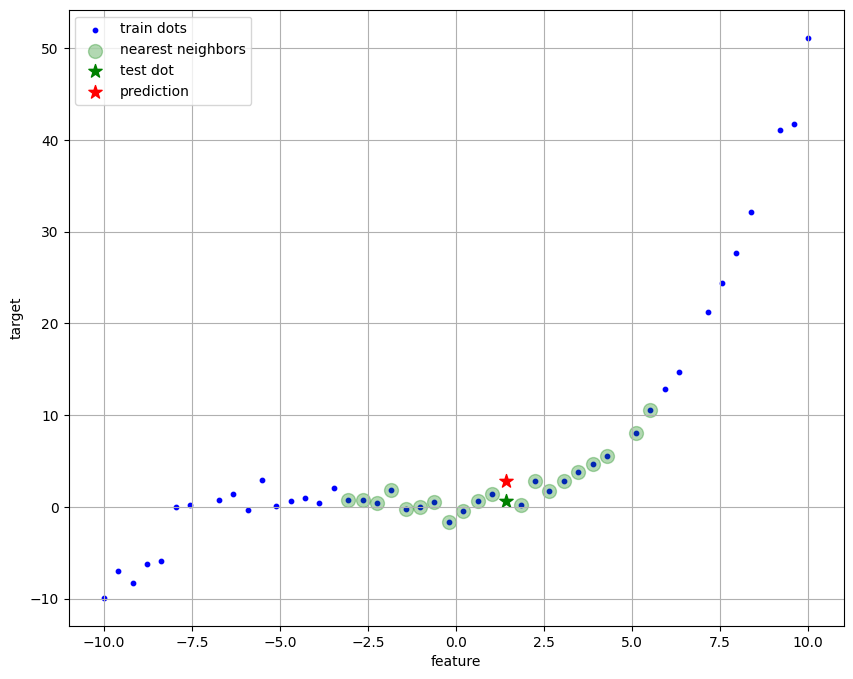

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(X_train, y_train, c='b', marker='o', s=10, label='train dots')
plt.grid()

plt.scatter(X_train[nearest_neigbors_idxs], y_train[nearest_neigbors_idxs],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(X_test[idx, 0], y_test[idx], c='g', marker='*', s=100, label='test dot')
plt.scatter(X_test[idx, 0], pred_test[idx], c='r', marker='*', s=100, label='prediction')

plt.xlabel('feature')
plt.ylabel('target')
plt.legend();

А давайте возьмем еще один тестовый объект и сделаем для него точно такие же действия.

In [ ]:
idx = 1
test_dot = X_test[idx]

distances = pd.DataFrame()
for i, train_dot in enumerate(X_train):  # 1
    distances = distances.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2)  # 2
    }, ignore_index=True)

<ipython-input-38-5c3ac6444d00>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-38-5c3ac6444d00>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-38-5c3ac6444d00>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-38-5c3ac6444d00>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-38-5c3ac6444d00>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.appe

In [ ]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Int64Index([14, 39, 25, 2, 32, 29, 18, 28, 26, 6, 7, 20, 33, 13, 19, 9, 23, 0,
            43, 11],
           dtype='int64')

Отрисовываем 20 найденных соседей в полупрозрачные зеленые окружности.

Вот здесь уже не совпадаем даже на чуть-чуть, предсказание очень сильно отличается от истины, а значит все-таки 20 соседей - это перебор.

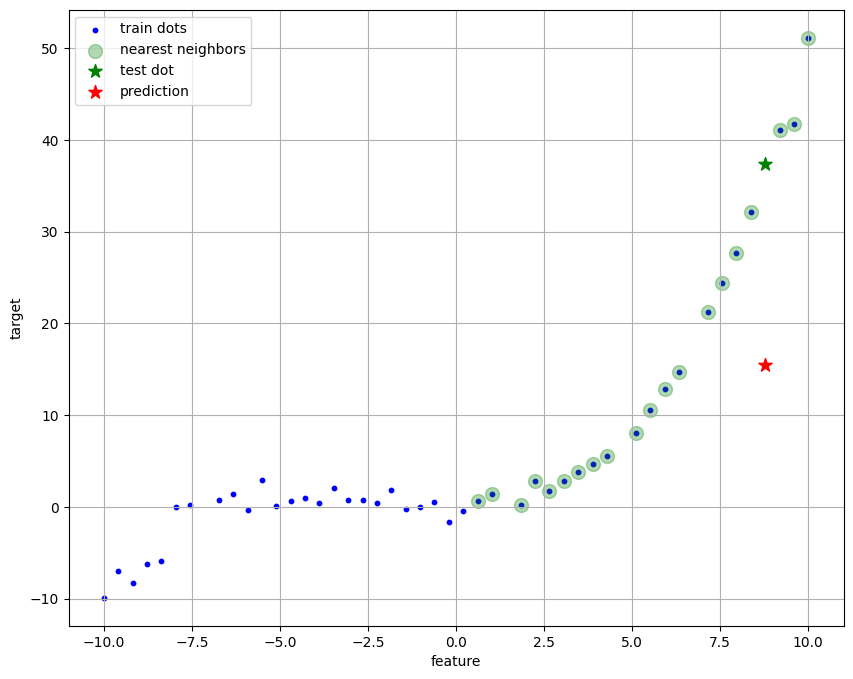

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(X_train, y_train, c='b', marker='o', s=10, label='train dots')
plt.grid()

plt.scatter(X_train[nearest_neigbors_idxs], y_train[nearest_neigbors_idxs],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(X_test[idx, 0], y_test[idx], c='g', marker='*', s=100, label='test dot')
plt.scatter(X_test[idx, 0], pred_test[idx], c='r', marker='*', s=100, label='prediction')

plt.xlabel('feature')
plt.ylabel('target')

plt.legend();

Давайте снова с этим бороться с помощью **Weighted KNN (взвешенный KNN)**

### Взвешенный KNN

Вспомним, что по умолчанию модель с `sklearn` обучается с атрибутом `weights=uniform` - это значит, что каждый сосед одинаково важен и одинаково влияет на финальное предсказание модели.

In [ ]:
KNeighborsRegressor?

Но мы можем это поменять и сделать каких-то соседей более значимыми, а каких-то менее, для этого атрибут `weights` поменяем на `distance`.

В этом случае веса будут обратными расстоянию до объектов с обучения.

In [ ]:
n_neighbors = 20
model = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')

In [ ]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

Для справки
```
-1.22454737493758
```

In [ ]:
prev_pred_test = pred_test.copy()

In [ ]:
pred_test = model.predict(X_test)
r2_score(pred_test, y_test)

0.8683987446927024

Метрика стала гораздо лучше, а всего лишь изменили способ подсчета ближайших соседей.

#### Детали получения предсказания в KNN

Возьмем тот объект, где была ошибка.

In [ ]:
idx = 1
test_dot = X_test[idx]

distances = pd.DataFrame()
for i, train_dot in enumerate(X_train):  # 1
    distances = distances.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2),  # 2
        'label': y_train[i][0]
    }, ignore_index=True)

<ipython-input-46-0cae3a1be52d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-46-0cae3a1be52d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-46-0cae3a1be52d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-46-0cae3a1be52d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.append({
<ipython-input-46-0cae3a1be52d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances = distances.appe

In [ ]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Int64Index([14, 39, 25, 2, 32, 29, 18, 28, 26, 6, 7, 20, 33, 13, 19, 9, 23, 0,
            43, 11],
           dtype='int64')

Все те же самые соседи, но предсказание сейчас гораздо лучше, ведь теперь те соседи, которые находятся далеко влияют меньше, а те, кто близко влияют больше.

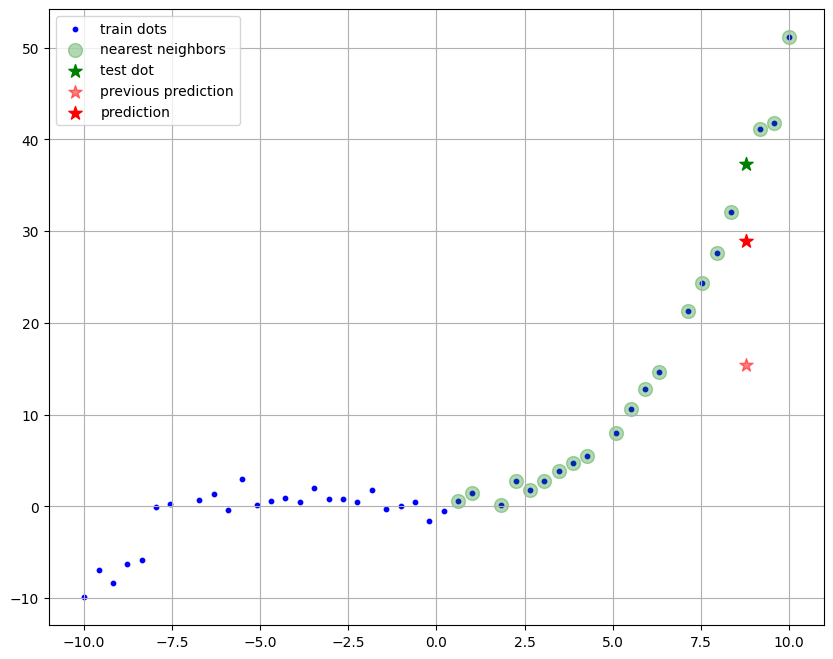

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(X_train, y_train, c='b', marker='o', s=10, label='train dots')
plt.grid()

plt.scatter(X_train[nearest_neigbors_idxs], y_train[nearest_neigbors_idxs],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(X_test[idx, 0], y_test[idx], c='g', marker='*', s=100, label='test dot')
plt.scatter(X_test[idx, 0], prev_pred_test[idx][0], c='r', alpha=0.5, marker='*', s=100, label='previous prediction')
plt.scatter(X_test[idx, 0], pred_test[idx], c='r', marker='*', s=100, label='prediction')

plt.legend();

Можем рассчитать вес каждого соседа, для этого 1 поделим на расстояние до объекта.

In [ ]:
distances['weight'] = 1 / (distances['dst'])
distances = distances.sort_values('dst').head(n_neighbors)
distances

,train_idx,dst,label,weight
14,14.0,0.408163,41.110557,2.450000
39,39.0,0.408163,32.127914,2.450000
25,25.0,0.816327,27.640171,1.225000
2,2.0,0.816327,41.740175,1.225000
32,32.0,1.224490,51.139534,0.816667
29,29.0,1.224490,24.395433,0.816667
18,18.0,1.632653,21.280717,0.612500
28,28.0,2.448980,14.667229,0.408333
26,26.0,2.857143,12.815946,0.350000
6,6.0,3.265306,10.590643,0.306250


<ipython-input-50-f08958cd4bec>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(x, 1/(x))


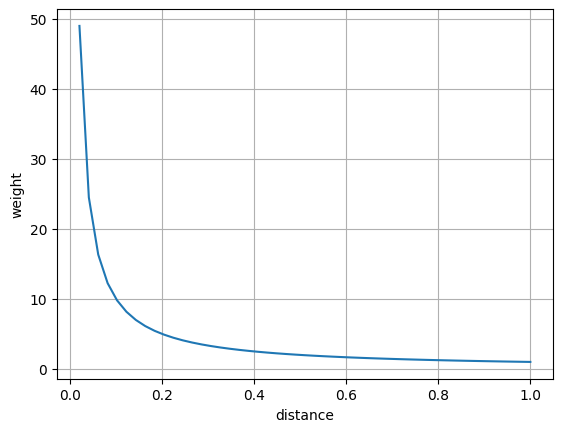

In [ ]:
x = np.linspace(0, 1, 50)
plt.plot(x, 1/(x))
plt.grid()
plt.ylabel('weight')
plt.xlabel('distance');

Зная вес каждого соседа, можем посчитать нормированную взвешенную сумму предсказания.


In [ ]:
idx

1

In [ ]:
(distances['label'] * distances['weight']).sum() / distances['weight'].sum()

28.905126006757015

In [ ]:
y_test[idx]

array([37.3778963])

Получаем, что по обычному большинству предсказание было слишком маленькое, из-за того, что есть точки с маленькими значениями и их больше, но они расположены дальше.

In [ ]:
prev_pred_test[idx]

array([15.45383115])

А с помощью весов предсказание получилось гораздо лучше, ведь те объекты, которые расположены далеко и имеют маленькие целевые значения, теперь влияют не так сильно.

In [ ]:
pred_test[idx]

array([28.90512601])

И можем с помощью визуализации отрисовать важность соседей.

Те, кто ближе имеют полузеленую окружность больше, а те, кто дальше имеют маленькую окружность.

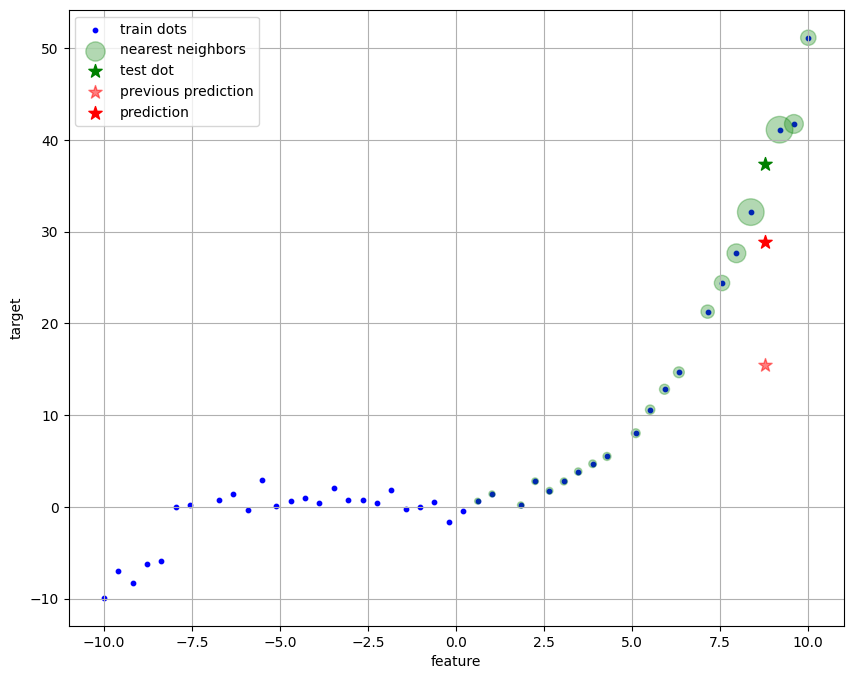

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(X_train, y_train, c='b', marker='o', s=10, label='train dots')
plt.grid()

plt.scatter(X_train[nearest_neigbors_idxs], y_train[nearest_neigbors_idxs],
            c='g', alpha=0.3, marker='o', s=distances['weight']*150, label='nearest neighbors')

plt.scatter(X_test[idx, 0], y_test[idx], c='g', marker='*', s=100, label='test dot')
plt.scatter(X_test[idx, 0], prev_pred_test[idx][0], c='r', alpha=0.5, marker='*', s=100, label='previous prediction')
plt.scatter(X_test[idx, 0], pred_test[idx], c='r', marker='*', s=100, label='prediction')

plt.xlabel('feature')
plt.ylabel('target')

plt.legend();

#### Резюме взвешенного KNN


На **моменте обучения** ничего интересного не происходит: все точки из обучения попросту запоминаются.

На **моменте предсказания**:
1. для тестовой точки считаем расстояния до всех точек с обучения
2. сортируем от самого ближнего до самого дальнего расстояния
3. считаем веса для ближайших $N$ соседей
4. умножаем веса на таргеты соседей
5. суммируем перемножения
6. нормируем на сумму весов

## Callable объект в атрибут weights

С взвешенными KNN для регрессии и классификации разобрались, теперь можем поговорить, а какие еще веса можем использовать для модели.

А на самом деле мы не ограничиваемся значениями `uniform` и `distance` в атрибуте `weights`, мы можем написать свою кастомную функцию для подсчета весов.



К примеру, давайте реализуем аналог `distance`.

На вход эта функция должна принимать массив дистанций и выдавать массив весов.

In [ ]:
def calc_weight_distance(dists):
    return 1 / dists

Теперь эту функцию можем передать в атрибут `weights`.

In [ ]:
n_neighbors = 20
model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=calc_weight_distance)

In [ ]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights=<function calc_weight_distance at 0x7fb171dae7a0>)

И убедимся, что предсказания и метрики получаются идентичными.

Для справки (вот такая метрика была на KNN из `sklearn`)
```
0.8683987446927024
```

In [ ]:
pred_test = model.predict(X_test)
r2_score(pred_test, y_test)

0.8683987446927024

Можем реализовать немного другую функцию подсчета весов.

In [ ]:
def calc_weight_distance_2(dists):
    return 0.5 ** dists

Теперь эту функцию можем передать в атрибут `weights`.

In [ ]:
n_neighbors = 20
model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=calc_weight_distance_2)

In [ ]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights=<function calc_weight_distance_2 at 0x7fb171dae200>)

И посмотрим, что стало с метрикой.

А так вышло, что она стала выше. Значит данный метод рассчета весов подходит для этой задачи больше.

In [ ]:
pred_test = model.predict(X_test)
r2_score(pred_test, y_test)

0.9369864623634033

Давайте в целом посмотрим, какие виды функций можно придумывать для подсчета весов.

### От расстояния $d$


#### - $w(d) = q^{d}$,   $q \in (0,1)$;

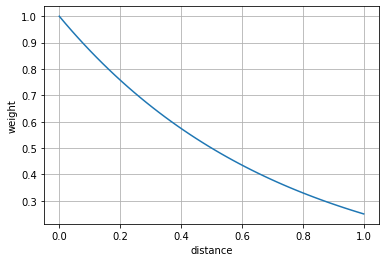

In [ ]:
q = 0.25
x = np.linspace(0, 1, 50)
plt.plot(x, q ** x)
plt.xlabel('distance')
plt.ylabel('weight')
plt.grid();

#### - $w(d) = \frac{1}{d+a}$,
брать вес $\frac{1}{d}$ - неудачное решение, так как при $d = 0$ вес будет бесконечно большим


В `sklearn` такую ситуацию обходят путем присваивания веса 1 для такого объекта, а все остальные объекты будут иметь вес 0.

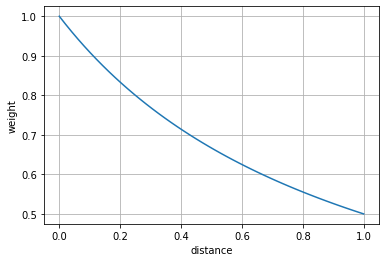

In [ ]:
a = 1
x = np.linspace(0, 1, 50)
plt.plot(x, 1 / (x + a))
plt.xlabel('distance')
plt.ylabel('weight')
plt.grid();

### От номера соседа $i$

#### - $w(i) = q^{i}$,   $q \in (0,1)$;

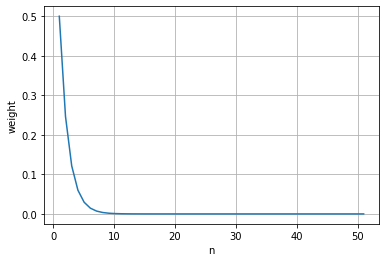

In [ ]:
q = 0.5
x = np.linspace(1, 51, 50)
plt.plot(x, q ** x)
plt.xlabel('n')
plt.ylabel('weight')
plt.grid();

#### - $w(i) = \frac{1}{i}$;

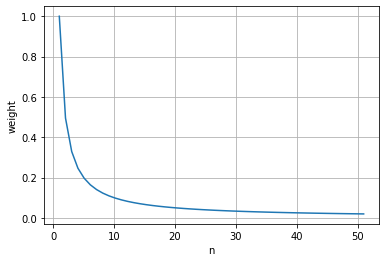

In [ ]:
x = np.linspace(1, 51, 50)
plt.plot(x, 1/x)
plt.xlabel('n')
plt.ylabel('weight')
plt.grid();

И давайте ради примера реализцем функцию подсчета весов от номера соседа.

In [ ]:
def calc_weight_n_neigbours(dists):
    weights = np.zeros(dists.shape)

    for i in range(dists.shape[1]):
        weights[:, i] = 1/(i+1)

    return weights

Теперь эту функцию можем передать в атрибут `weights`.

In [ ]:
n_neighbors = 20
model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=calc_weight_n_neigbours)

In [ ]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights=<function calc_weight_n_neigbours at 0x7fb171f03dd0>)

In [ ]:
pred_test = model.predict(X_test)
r2_score(pred_test, y_test)

0.7710471732745973